In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

In [23]:
df = pd.read_csv(url, sep=",")
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [24]:
print(df.head())

print("\nINFO:")
print(df.info())

print("\nDESCRIBE:")
print(df.describe(include="all"))

print("\nValori unici (categoriche):")
print("month:", df["month"].unique())
print("day:", df["day"].unique())



   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 n

In [25]:
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


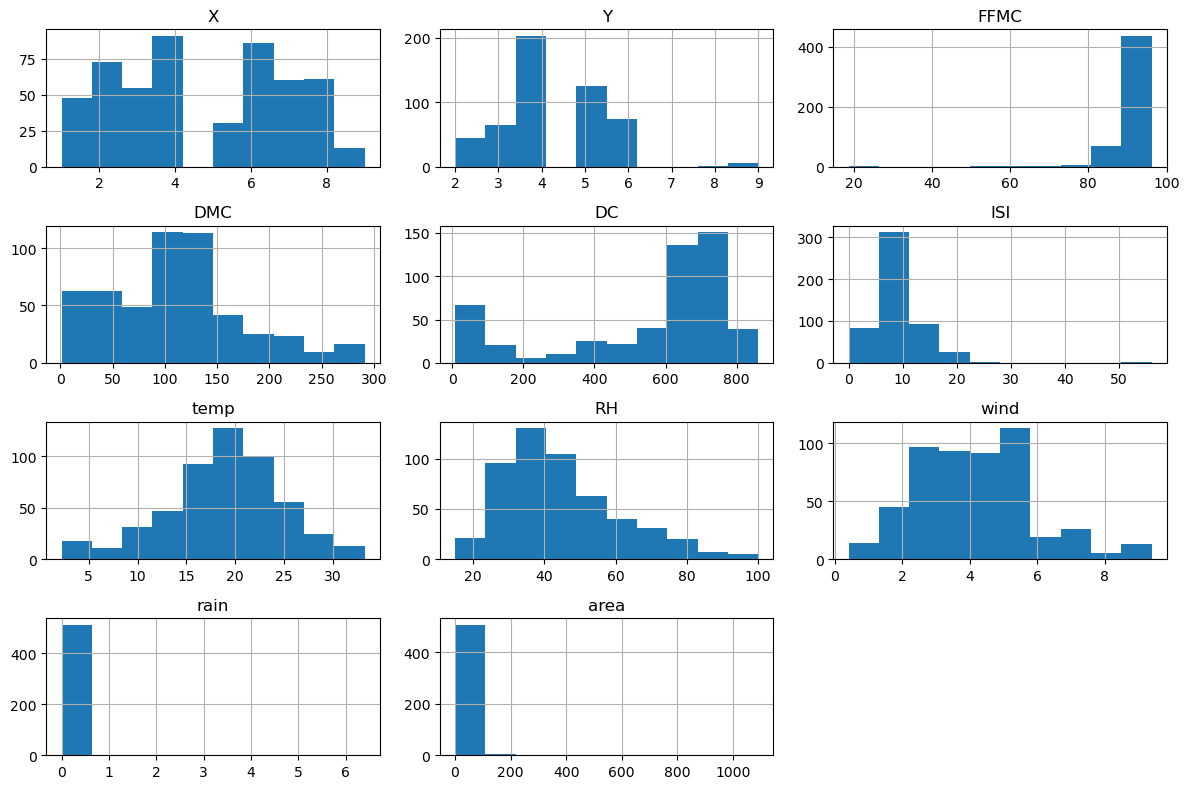

In [26]:
ax = df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()



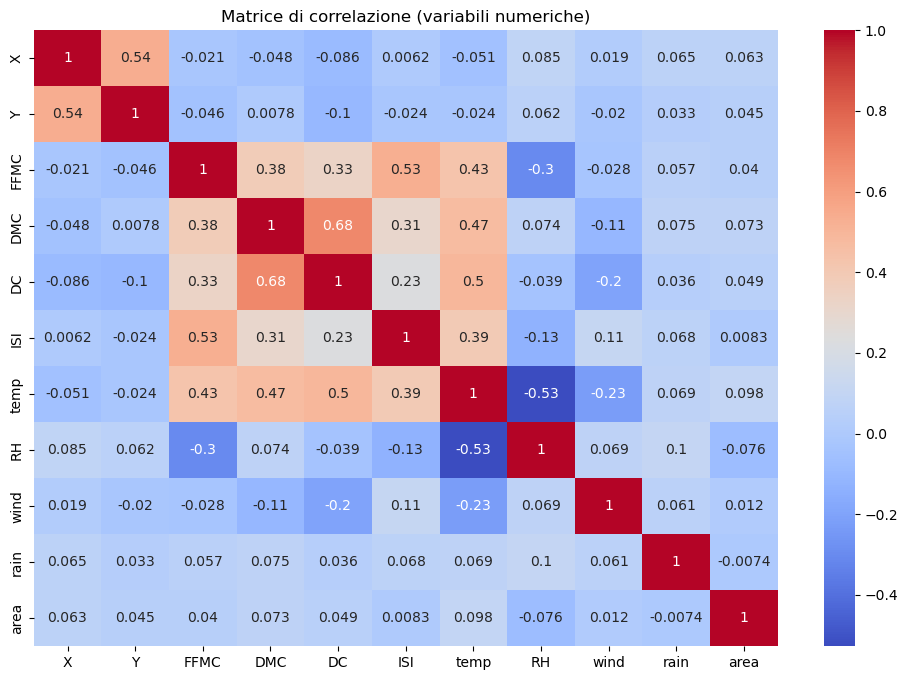

In [27]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matrice di correlazione (variabili numeriche)")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['area'], bins=50, kde=True)
plt.title("Distribuzione della superficie bruciata (area)")
plt.xlabel("Ettari bruciati")
plt.ylabel("Frequenza")
plt.show()


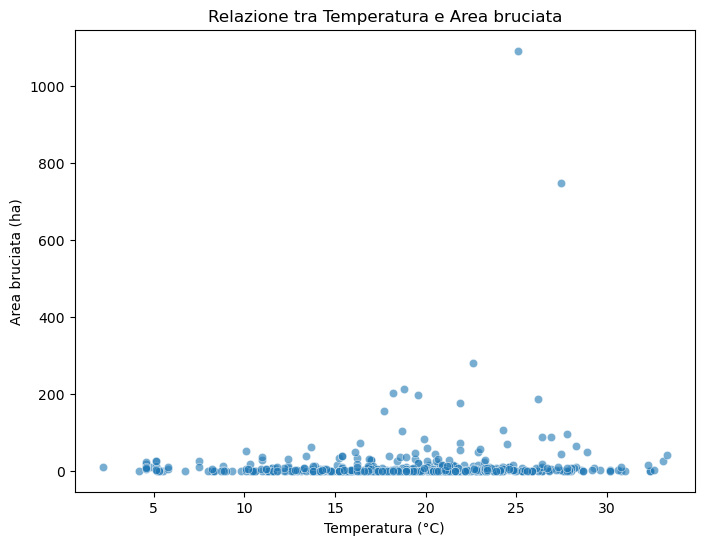

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="temp", y="area", data=df, alpha=0.6)
plt.title("Relazione tra Temperatura e Area bruciata")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Area bruciata (ha)")
plt.show()


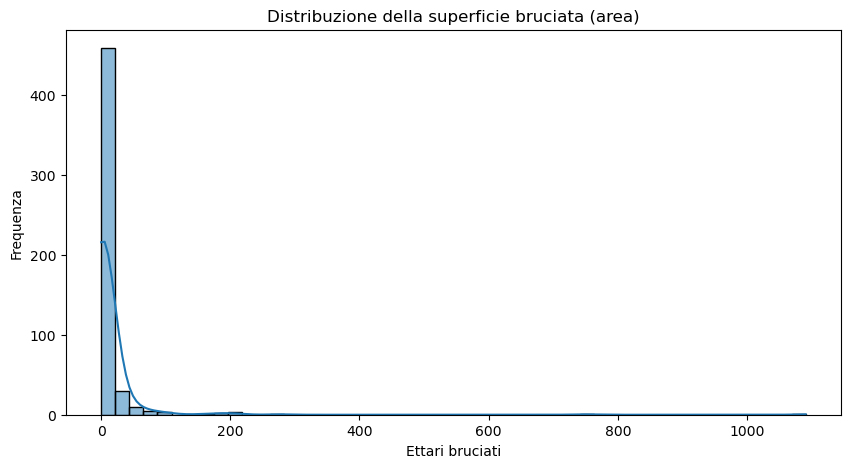

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df["area"], bins=50, kde=True)
plt.title("Distribuzione della superficie bruciata (area)")
plt.xlabel("Ettari bruciati")
plt.ylabel("Frequenza")
plt.show()

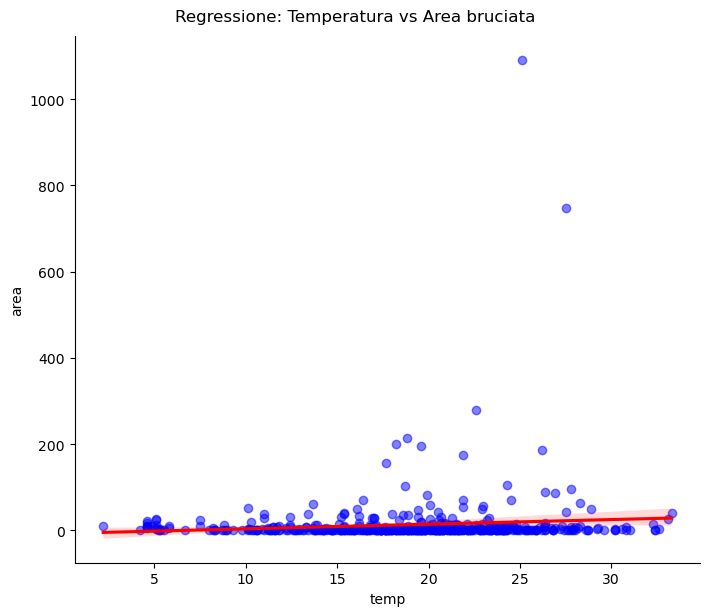

In [30]:
sns.lmplot(
    x="temp", y="area", data=df,
    height=6, aspect=1.2,
    scatter_kws={"alpha":0.5, "color":"blue"},
    line_kws={"color":"red"}
)

plt.suptitle("Regressione: Temperatura vs Area bruciata", y=1.02)
plt.show()


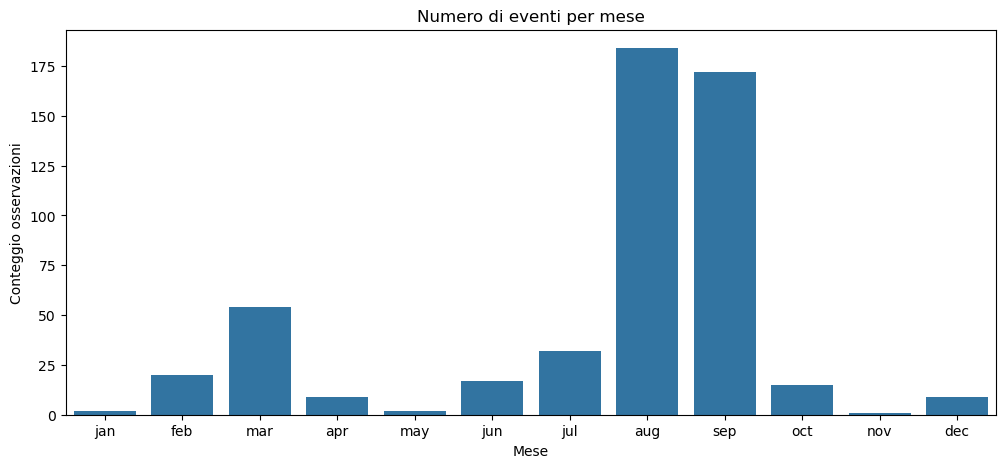

In [31]:
order_month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

plt.figure(figsize=(12,5))
sns.countplot(x="month", data=df, order=order_month)
plt.title("Numero di eventi per mese")
plt.xlabel("Mese")
plt.ylabel("Conteggio osservazioni")
plt.show()



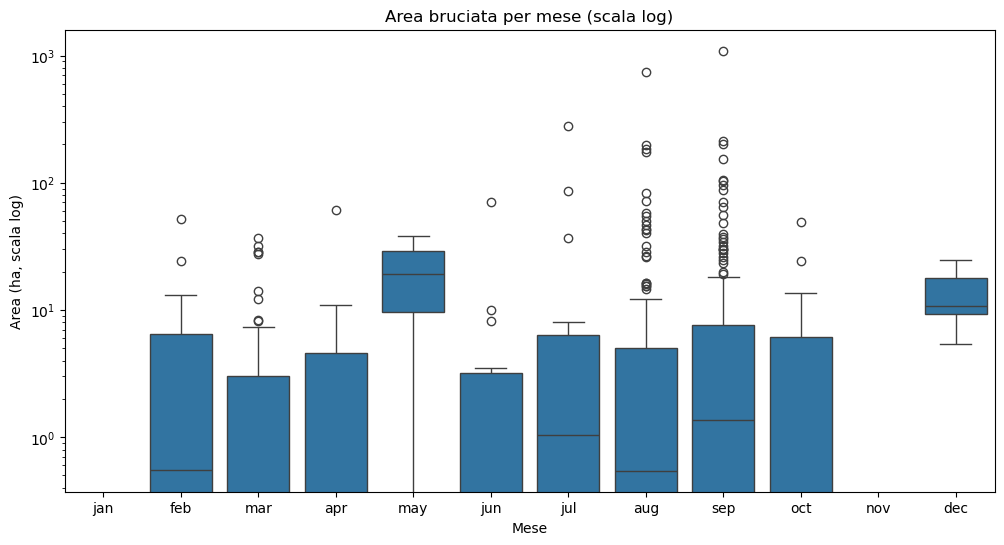

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="area", data=df, order=order_month)
plt.yscale("log")
plt.title("Area bruciata per mese (scala log)")
plt.xlabel("Mese")
plt.ylabel("Area (ha, scala log)")
plt.show()


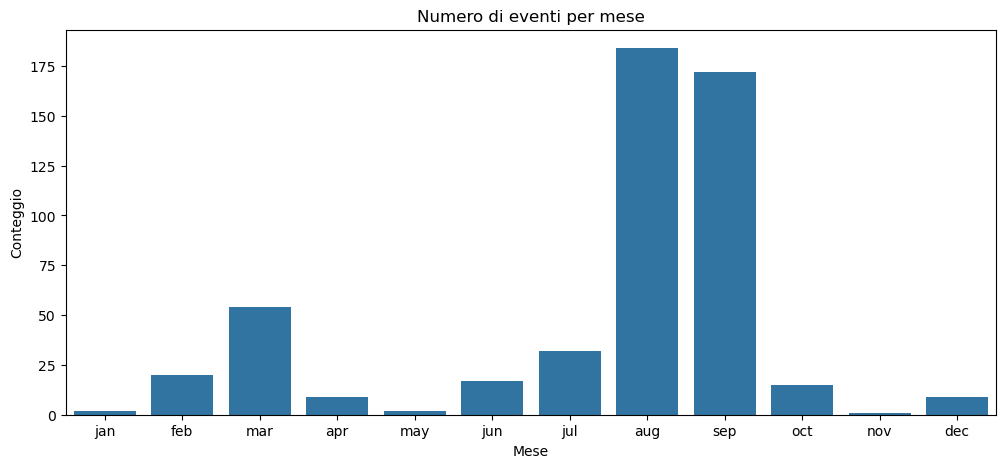

In [33]:
order_month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

plt.figure(figsize=(12,5))
sns.countplot(x="month", data=df, order=order_month)
plt.title("Numero di eventi per mese")
plt.xlabel("Mese")
plt.ylabel("Conteggio")
plt.show()


In [34]:
summary = (
    df.assign(big_fire = (df["area"] > 0).astype(int))
      .groupby("month")
      .agg(
          count=("area","size"),
          mean_area=("area","mean"),
          median_area=("area","median"),
          pct_with_fire=("big_fire","mean")
      )
      .reindex(order_month)
)
summary["pct_with_fire"] = (summary["pct_with_fire"]*100).round(1)
summary.round({"mean_area":2, "median_area":2})


,count,mean_area,median_area,pct_with_fire
month,,,,
jan,2,0.00,0.00,0.0
feb,20,6.28,0.55,50.0
mar,54,4.36,0.00,35.2
apr,9,8.89,0.00,44.4
may,2,19.24,19.24,50.0
jun,17,5.84,0.00,47.1
jul,32,14.37,1.04,56.2
aug,184,12.49,0.55,53.8
sep,172,17.94,1.36,56.4


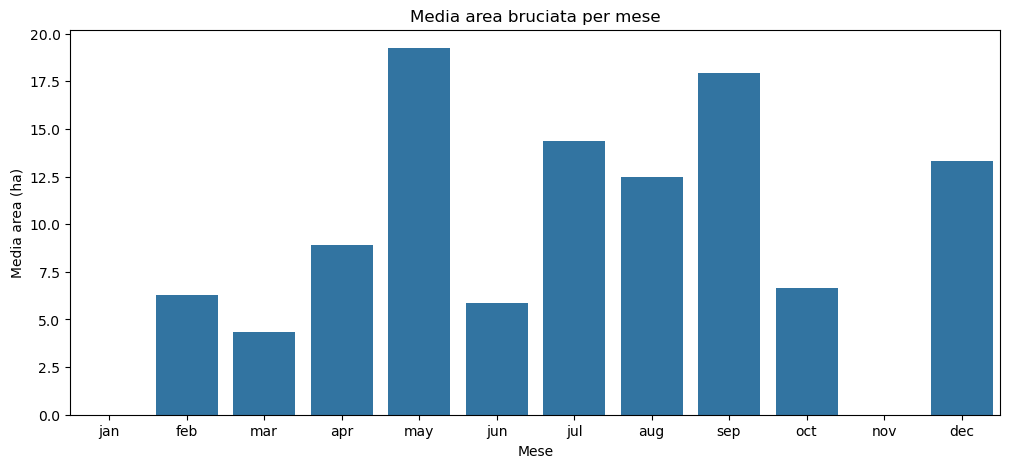

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(x="month", y="mean_area", data=summary.reset_index(), order=order_month)
plt.title("Media area bruciata per mese")
plt.xlabel("Mese"); plt.ylabel("Media area (ha)")
plt.show()


In [36]:
df["big_fire"] = (df["area"] > 10).astype(int)

# Controllo sbilanciamento classi
print("Distribuzione classi (0=piccolo/nessuno, 1=grande):")
print(df["big_fire"].value_counts())
print("\nPercentuali:")
print((df["big_fire"].value_counts(normalize=True)*100).round(2))


Distribuzione classi (0=piccolo/nessuno, 1=grande):
big_fire
0    422
1     95
Name: count, dtype: int64

Percentuali:
big_fire
0    81.62
1    18.38
Name: proportion, dtype: float64


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Feature: tutte tranne 'area' e il target
feature_cols = [c for c in df.columns if c not in ["area", "big_fire"]]
X = df[feature_cols]
y = df["big_fire"]

# Preprocess: one-hot sulle categoriche, passa-through sul resto
cat_cols = ["month", "day"]
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="passthrough"
)

# Split (stratificato perché le classi sono sbilanciate)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Modello: RF con pesi bilanciati
clf = Pipeline(steps=[
    ("pre", preprocess),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

clf.fit(X_train, y_train)
print("Model trained ✔️")


Model trained ✔️


              precision    recall  f1-score   support

           0      0.828     0.965     0.891        85
           1      0.400     0.105     0.167        19

    accuracy                          0.808       104
   macro avg      0.614     0.535     0.529       104
weighted avg      0.750     0.808     0.759       104



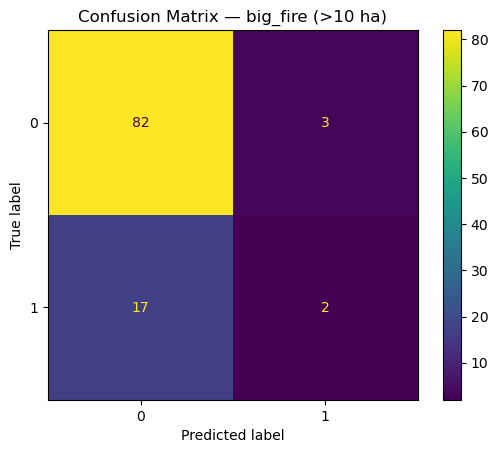

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predizioni sul test set
y_pred = clf.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix — big_fire (>10 ha)")
plt.show()


ROC-AUC: 0.684


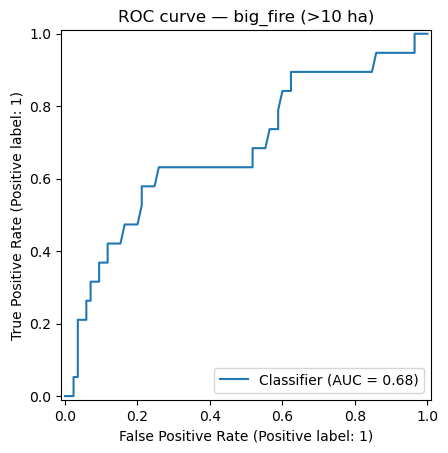

In [40]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Probabilità della classe positiva (1 = incendio grande)
y_proba = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {auc:.3f}")

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC curve — big_fire (>10 ha)")
plt.show()


Top 15 feature importance:
temp         0.126610
RH           0.114733
DMC          0.101791
DC           0.094946
wind         0.090906
ISI          0.088672
FFMC         0.086789
X            0.084735
Y            0.055115
month_sep    0.015828
day_sun      0.014836
day_mon      0.014796
day_sat      0.014507
day_fri      0.014261
month_aug    0.012275
dtype: float64


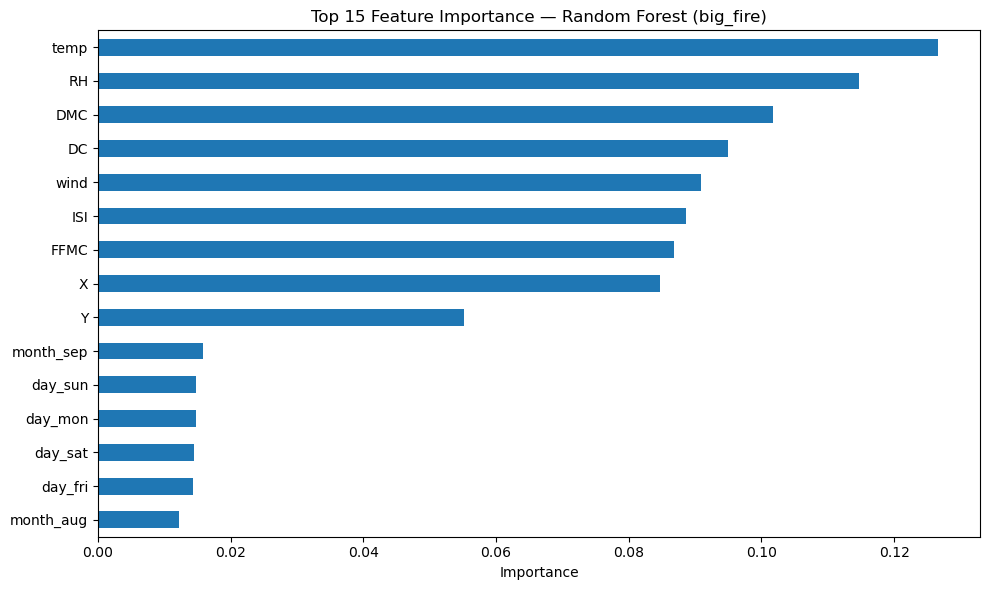

In [41]:
import pandas as pd
import numpy as np

# Recupero nomi colonne dopo il preprocessing
ohe = clf.named_steps["pre"].named_transformers_["cat"]
ohe_names = ohe.get_feature_names_out(cat_cols)
# Le numeriche passate-through arrivano dopo le categoriche
num_cols = [c for c in feature_cols if c not in cat_cols]
all_feature_names = np.concatenate([ohe_names, np.array(num_cols)])

importances = clf.named_steps["rf"].feature_importances_
fi = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

print("Top 15 feature importance:")
print(fi.head(15))

plt.figure(figsize=(10,6))
fi.head(15).iloc[::-1].plot(kind="barh")
plt.title("Top 15 Feature Importance — Random Forest (big_fire)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


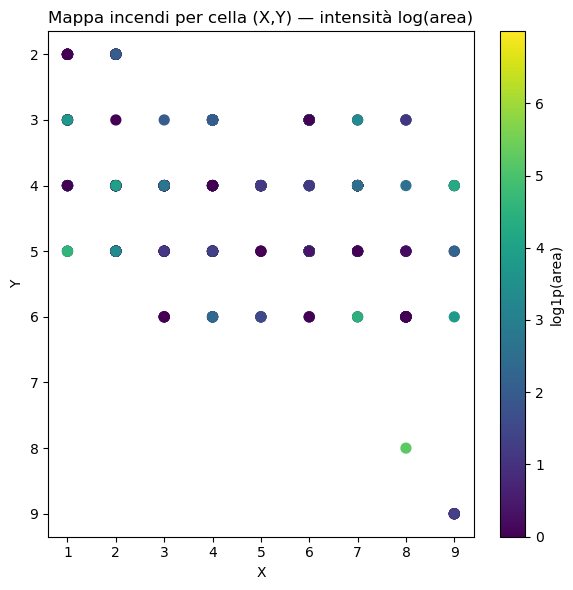

In [42]:
# Visualizzazione spaziale (celle X,Y) colorate per intensità log(area)
plt.figure(figsize=(6,6))
sc = plt.scatter(df["X"], df["Y"], c=np.log1p(df["area"]), s=50)
plt.colorbar(sc, label="log1p(area)")
plt.title("Mappa incendi per cella (X,Y) — intensità log(area)")
plt.xlabel("X"); plt.ylabel("Y")
plt.gca().invert_yaxis()  # per allineare al sistema usato nel paper originale
plt.tight_layout()
plt.show()


In [45]:
import os
import numpy as np

# crea automaticamente la cartella imgs se non esiste
os.makedirs("imgs", exist_ok=True)

# Boxplot area ~ month (scala log)
plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="area", data=df,
            order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.yscale("log")
plt.title("Area bruciata per mese (scala log)")
plt.savefig("imgs/boxplot_area_month_log.png", bbox_inches="tight", dpi=150)
plt.close()

# Mappa incendi (X,Y)
plt.figure(figsize=(6,6))
sc = plt.scatter(df["X"], df["Y"], c=np.log1p(df["area"]), s=50, cmap="viridis")
plt.colorbar(sc, label="log1p(area)")
plt.title("Mappa incendi per cella (X,Y)")
plt.xlabel("X"); plt.ylabel("Y"); plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("imgs/map_xy_logarea.png", bbox_inches="tight", dpi=150)
plt.close()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Creo una colonna target binaria: 0 = incendio piccolo, 1 = incendio grande
df["big_fire"] = (df["area"] >= 10).astype(int)

# Seleziono solo le variabili numeriche come feature
X = df.drop(columns=["area", "month", "day", "big_fire"])
y = df["big_fire"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [47]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Previsioni
y_pred = model.predict(X_test)


Report di classificazione:

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       127
           1       0.60      0.10      0.18        29

    accuracy                           0.82       156
   macro avg       0.71      0.54      0.54       156
weighted avg       0.79      0.82      0.76       156



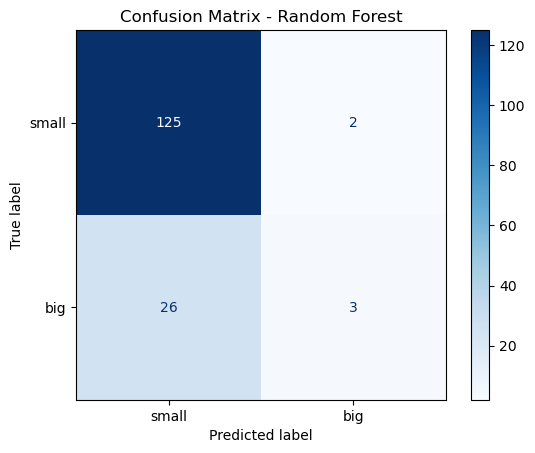

In [48]:
print("Report di classificazione:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["small","big"])
disp.plot(cmap="Blues")

plt.title("Confusion Matrix - Random Forest")
plt.show()


In [49]:
plt.savefig("imgs/confusion_matrix.png", bbox_inches="tight", dpi=150)
plt.close()